<a href="https://colab.research.google.com/github/padmini89/padmini-eng/blob/master/bank_loan_perdictor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/satssehgal/MLAPLI.git

Cloning into 'MLAPLI'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 38 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [2]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler #for getting to know max and min values in the data 
import warnings
from collections import Counter 
warnings.filterwarnings('ignore')
import seaborn as sns #for visulaizing array
import matplotlib.pyplot as plt #for plotting 
from keras import Sequential
from keras.layers import Dense

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [3]:
df=pd.read_csv('/content/MLAPLI/bankloan.csv')
df=df.dropna()
df.isna().any()
df=df.drop('Loan_ID',axis=1)
df['LoanAmount']=(df['LoanAmount']*1000).astype(int)
Counter(df['Loan_Status'])

Counter({'N': 148, 'Y': 332})

In [8]:
pre_y=df['Loan_Status']
pre_x=df.drop('Loan_Status', axis=1)
dm_x=pd.get_dummies(pre_x)
dm_y=pre_y.map(dict(Y=1,N=0))
dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71000,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40000,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [10]:
smote=SMOTE(ratio='minority')
x1,y=smote.fit_sample(dm_x,dm_y)
sc=MinMaxScaler()
x=sc.fit_transform(x1)

In [11]:
Counter(y)

Counter({0: 332, 1: 332})

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [25]:
classifier=Sequential()
classifier.add(Dense(400,activation='relu', kernel_initializer='random_normal', input_dim=x_test.shape[1]))
classifier.add(Dense(800, activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(10,activation='relu',kernel_initializer='random_normal'))
classifier.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.fit(x_train,y_train,batch_size=20,epochs=50,verbose=0)
eval_model=classifier.evaluate(x_train,y_train)
eval_model

                               
                              
                          

531/531 [==============================] - 0s 76us/step


[0.27299086112536053, 0.8813559412956238]

In [26]:
y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.4)

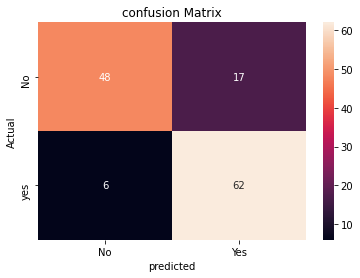

In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax);
#labels,title and ticks
ax.set_xlabel('predicted');ax.set_ylabel('Actual');
ax.set_title('confusion Matrix');
ax.xaxis.set_ticklabels(['No','Yes']); ax.yaxis.set_ticklabels(['No','yes']);

In [31]:
random_data=dm_x.sample(n=19)
random_data.to_excel('test.xlsx')

In [29]:
import pickle
from sklearn.externals import joblib
filename='loan_model.pkl'
joblib.dump(classifier,filename)

['loan_model.pkl']

loan_model.pkl can be used for predicting by calling a model predictor using sklearn library 